In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
# Load dataset 
df = pd.read_excel('../data/Online Retail.xlsx')

# Hapus data tanpa CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Hapus transaksi pembatalan (Invoice diawali "C")
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Tambahkan kolom TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Tentukan tanggal referensi (misal sehari setelah transaksi terakhir)
now = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [4]:
# Hitung RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]  # Hapus pelanggan tanpa pembelian

# Normalisasi
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

k=2, Silhouette Score=0.5605
k=3, Silhouette Score=0.5943
k=4, Silhouette Score=0.6161
k=5, Silhouette Score=0.4363
k=6, Silhouette Score=0.4923
k=7, Silhouette Score=0.5161
k=8, Silhouette Score=0.5169
k=9, Silhouette Score=0.4918
k=10, Silhouette Score=0.4177


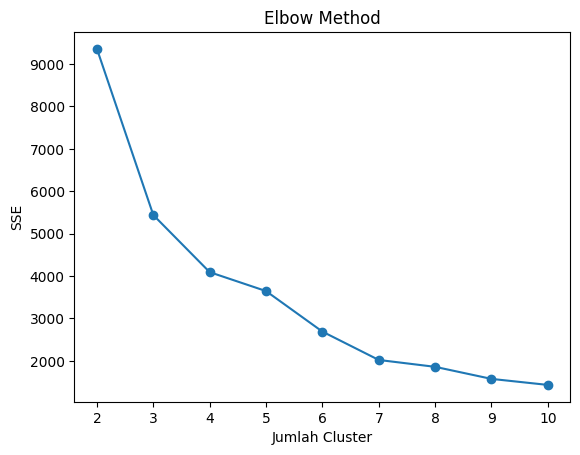

In [5]:
# Elbow method untuk mencari jumlah cluster
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    print(f'k={k}, Silhouette Score={score:.4f}')

# Visualisasi Elbow
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


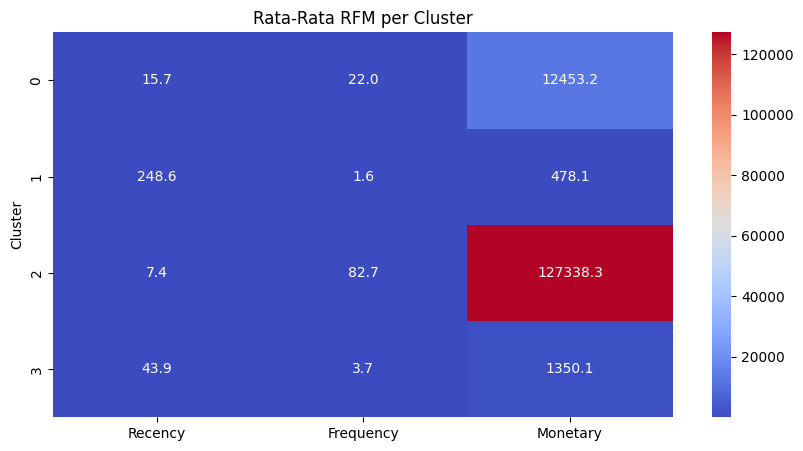


Cluster 0:
             Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         326          1  77183.60        0
12431.0          36         15   6487.45        0
12437.0           2         18   4951.41        0
12471.0           2         30  19824.05        0
12474.0          17         18   7375.79        0

Cluster 1:
             Recency  Frequency  Monetary  Cluster
CustomerID                                       
12350.0         310          1     334.4        1
12353.0         204          1      89.0        1
12354.0         232          1    1079.4        1
12355.0         214          1     459.4        1
12361.0         287          1     189.9        1

Cluster 2:
             Recency  Frequency   Monetary  Cluster
CustomerID                                        
12415.0          24         21  124914.53        2
12748.0           1        210   33719.73        2
13089.0           3         97   58825.83        2
14156.

In [7]:
# Rata-rata per cluster
cluster_avg = rfm.groupby('Cluster').mean()

# Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_avg, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Rata-Rata RFM per Cluster')
plt.show()

# Contoh output per cluster
for i in range(4):
    print(f"\nCluster {i}:\n", rfm[rfm['Cluster'] == i].head())
